# Wine Club Data Analysis - Part 3: Preference Correlation

In this post, I'll take a look at correlations between scores between people who have come to wine night.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'savefig.dpi' : 100})
sns.set_context("paper")
sns.set_style("darkgrid")
wines = pd.read_csv('wines.csv', index_col=0)
scores = pd.read_csv('scores.csv', index_col=0)
nights = pd.read_csv('nights.csv')

In [2]:
# Similarly to the last post, we'll remove some of the more infrequent members
tastings = scores.groupby('Name').count().Score.copy()
best_tasters = tastings[tastings >= tastings['Zac']].sort(inplace=False).index[::-1].values
scores = scores[scores.Name.isin(best_tasters)].copy()

I'll define a correlation plotting function to make the subsequent plots. Essentially, I am just reshaping the "scores" dataset to have names in the columns, wines in the rows. Then I use ``pandas`` to calculate a correlation matrix ([spearman's rank](http://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient), requiring a minimum of 10 wines tasted in common)

In [3]:
def corrplot(scores, title=None, ret=False):
    
    temp_scores = scores.loc[:, ['wine', 'Name', 'Score']].set_index('wine')
    scores_by_name = temp_scores.pivot(index=temp_scores.index, columns='Name')
    scores_by_name.columns = scores_by_name.columns.droplevel()
    scores_by_name = scores_by_name.join(wines.Price)

    name_order = [name for name in best_tasters if name in scores_by_name.columns]
    name_order += ['Price']

    correlations = scores_by_name.loc[:, name_order].corr(method='spearman', min_periods=10)

    plt.figure(figsize=(6,6))
    ax = sns.symmatplot(
        correlations, annot=False, names=correlations.index, cmap_range=(-1,1), 
        diag_names=False, cmap = "coolwarm")
    ax.grid(True, which='minor', linewidth=2)
    ax.patch.set_facecolor('white')
    ax.set_title(title)
    
    if ret: return correlations

Looking first at the results for all seasons, we see that the majority of the correlations are postive. (Note that I'm letting the color scale be relative here, and gray does not imply a correlation of 0).

Also note the final row, which is the correlation of each of our ratings with the price of the wine.

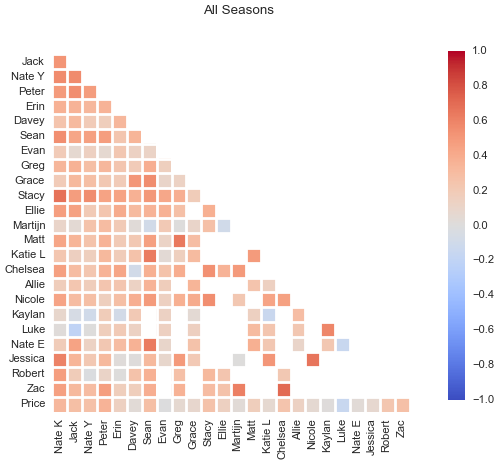

In [4]:
correlations = corrplot(scores, 'All Seasons', ret=True)

Hmm, I wonder who the *best* taster in the group is?

In [5]:
correlations.loc['Price'][:-1].argmax()

'Peter'

Oh right, of course.

Next I'll break down the results into individual seasons.

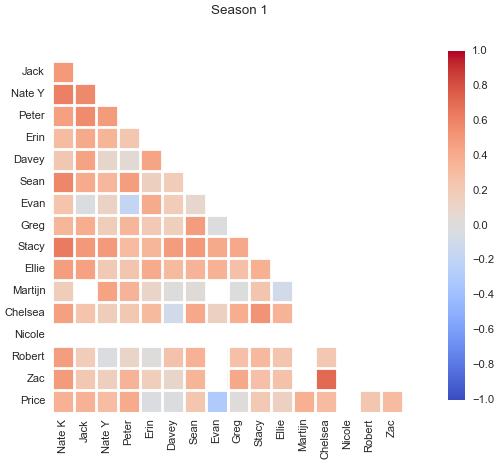

In [6]:
corrplot(scores[scores.season == 1], 'Season 1')

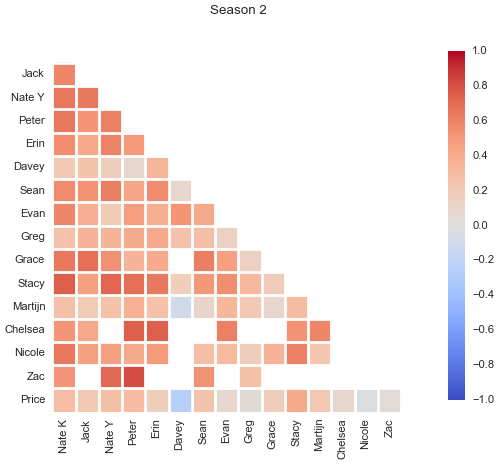

In [7]:
corrplot(scores[scores.season == 2], 'Season 2')

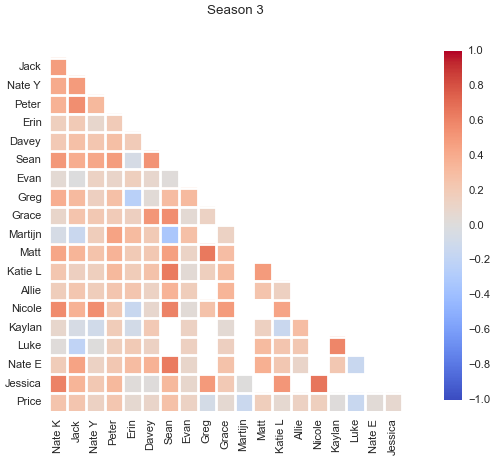

In [8]:
corrplot(scores[scores.season == 3], 'Season 3')